In [1]:
import tensorflow as tf

## 5.1合并与分割

#### 5.1.1 合并

In [2]:
a=tf.random.normal([4,35,8])
b=tf.random.normal([6,35,8])

In [4]:
tf.concat([a,b],axis=0).shape

TensorShape([10, 35, 8])

In [5]:
a=tf.random.normal([10,35,4])
b=tf.random.normal([10,35,4])

In [6]:
tf.concat([a,b],axis=-1).shape

TensorShape([10, 35, 8])

In [7]:
a=tf.random.normal([4,32,8])
b=tf.random.normal([6,35,8])

In [8]:
tf.concat([a,b],axis=0).shape

InvalidArgumentError: ConcatOp : Dimensions of inputs should match: shape[0] = [4,32,8] vs. shape[1] = [6,35,8] [Op:ConcatV2] name: concat

In [10]:
a=tf.random.normal([35,8])
b=tf.random.normal([35,8])
tf.stack([a,b],axis=0).shape

TensorShape([2, 35, 8])

In [11]:
a=tf.random.normal([35,8])
b=tf.random.normal([35,8])
tf.stack([a,b],axis=-1).shape

TensorShape([35, 8, 2])

In [12]:
a=tf.random.normal([35,8])
b=tf.random.normal([35,8])
tf.concat([a,b],axis=0).shape

TensorShape([70, 8])

In [13]:
a=tf.random.normal([35,4])
b=tf.random.normal([35,8])
tf.stack([a,b],axis=-1).shape

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [35,4] != values[1].shape = [35,8] [Op:Pack] name: stack

#### 5.1.2 分割

In [16]:
x=tf.random.normal([10,35,8])
result=tf.split(x,axis=0,num_or_size_splits=10)
len(result)

10

In [19]:
result[0].shape

TensorShape([1, 35, 8])

In [20]:
x=tf.random.normal([10,35,8])
result=tf.split(x,axis=0,num_or_size_splits=[4,2,2,2])
len(result)

4

In [21]:
for i in result:
    print(i.shape)

(4, 35, 8)
(2, 35, 8)
(2, 35, 8)
(2, 35, 8)


In [22]:
x=tf.random.normal([10,35,8])
result=tf.unstack(x,axis=0)
len(result)

10

In [23]:
for i in result:
    print(i.shape)

(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)


## 5.2数据统计

#### 5.2.1 向量范数

In [26]:
import numpy as np

In [24]:
x=tf.ones([2,2])
tf.norm(x,ord=1)

<tf.Tensor: id=196, shape=(), dtype=float32, numpy=4.0>

In [25]:
tf.norm(x,ord=2)

<tf.Tensor: id=201, shape=(), dtype=float32, numpy=2.0>

In [27]:
tf.norm(x,ord=np.inf)

<tf.Tensor: id=205, shape=(), dtype=float32, numpy=1.0>

In [28]:
tf.norm(x,ord=4)

<tf.Tensor: id=213, shape=(), dtype=float32, numpy=1.4142135>

#### 5.2.1 最大值最小值、均值、和

In [29]:
x=tf.random.normal([4,10])
tf.reduce_max(x,axis=1)

<tf.Tensor: id=221, shape=(4,), dtype=float32, numpy=array([1.7105869, 0.9716131, 1.3845176, 1.1493968], dtype=float32)>

In [31]:
tf.reduce_max(x,axis=0).shape

TensorShape([10])

In [30]:
tf.reduce_min(x,axis=1)

<tf.Tensor: id=223, shape=(4,), dtype=float32, numpy=array([-1.4444133 , -0.90765244, -1.00772   , -1.6260893 ], dtype=float32)>

In [33]:
tf.reduce_mean(x,axis=1)

<tf.Tensor: id=229, shape=(), dtype=float32, numpy=0.12671034>

In [34]:
x=tf.random.normal([4,10])
tf.reduce_max(x),tf.reduce_min(x),tf.reduce_mean(x)

(<tf.Tensor: id=237, shape=(), dtype=float32, numpy=1.7327782>,
 <tf.Tensor: id=239, shape=(), dtype=float32, numpy=-1.9091047>,
 <tf.Tensor: id=241, shape=(), dtype=float32, numpy=-0.1782697>)

In [35]:
out=tf.random.normal([4,10])
y=tf.constant([1,2,2,0])
y=tf.one_hot(y,depth=10)
loss=tf.keras.losses.mse(y,out)
loss.shape

TensorShape([4])

In [36]:
tf.reduce_mean(loss)

<tf.Tensor: id=257, shape=(), dtype=float32, numpy=1.6506989>

In [37]:
out=tf.random.normal([4,10])
tf.reduce_sum(out,axis=-1)

<tf.Tensor: id=265, shape=(4,), dtype=float32, numpy=array([ 2.5987988, -4.0377703,  1.1340842,  6.8188524], dtype=float32)>

In [41]:
out=tf.random.normal([2,10])
out=tf.nn.softmax(out,axis=1)
out.shape

TensorShape([2, 10])

In [44]:
out

<tf.Tensor: id=293, shape=(2, 10), dtype=float32, numpy=
array([[0.02488917, 0.01113113, 0.10141779, 0.2692141 , 0.09953744,
        0.03431126, 0.15306135, 0.01380434, 0.20224556, 0.09038786],
       [0.4779893 , 0.04419185, 0.01818079, 0.07120989, 0.0117971 ,
        0.04952868, 0.11289416, 0.07318234, 0.02370042, 0.11732546]],
      dtype=float32)>

In [43]:
pred=tf.argmax(out,axis=1)
pred

<tf.Tensor: id=297, shape=(2,), dtype=int64, numpy=array([3, 0], dtype=int64)>

## 5.3张量比较

In [45]:
out=tf.random.normal([100,10])
out=tf.nn.softmax(out,axis=1)
pred=tf.argmax(out,axis=1)
pred

<tf.Tensor: id=306, shape=(100,), dtype=int64, numpy=
array([0, 9, 7, 3, 7, 4, 3, 9, 0, 3, 8, 8, 9, 3, 7, 3, 6, 4, 5, 1, 0, 5,
       5, 4, 0, 9, 0, 7, 3, 7, 2, 6, 1, 5, 7, 2, 9, 6, 6, 9, 8, 2, 6, 5,
       5, 3, 6, 7, 3, 9, 6, 0, 1, 6, 8, 3, 2, 9, 7, 2, 5, 9, 0, 9, 6, 8,
       1, 0, 9, 1, 7, 5, 5, 8, 3, 0, 8, 8, 5, 5, 4, 3, 9, 8, 8, 1, 2, 7,
       6, 1, 5, 4, 0, 9, 5, 7, 0, 6, 8, 8], dtype=int64)>

In [49]:
y=tf.random.uniform([100],dtype=tf.int64,maxval=10)

In [50]:
y

<tf.Tensor: id=314, shape=(100,), dtype=int64, numpy=
array([3, 0, 8, 9, 2, 2, 7, 6, 7, 8, 1, 7, 2, 6, 3, 1, 1, 8, 6, 3, 9, 7,
       5, 2, 0, 8, 9, 4, 4, 0, 0, 2, 3, 8, 4, 2, 8, 5, 9, 1, 7, 8, 9, 6,
       6, 8, 0, 1, 0, 8, 3, 3, 1, 1, 0, 1, 1, 2, 5, 4, 3, 0, 5, 0, 6, 9,
       7, 6, 7, 2, 0, 0, 8, 9, 1, 3, 3, 5, 7, 7, 8, 0, 8, 0, 2, 6, 1, 6,
       0, 2, 6, 4, 5, 7, 5, 2, 2, 6, 7, 6], dtype=int64)>

In [51]:
tf.equal(pred,y)

<tf.Tensor: id=315, shape=(100,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False])>

In [52]:
tf.math.equal(pred,y)

<tf.Tensor: id=316, shape=(100,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False])>

In [53]:
tf.reduce_sum(tf.cast(tf.equal(pred,y),dtype=tf.float32))

<tf.Tensor: id=320, shape=(), dtype=float32, numpy=8.0>

## 5.4填充与复制

#### 5.4.1 填充

In [55]:
a=tf.constant([1,2,3,4,5,6])
b=tf.constant([7,8,1,6])
b.shape

TensorShape([4])

In [56]:
b=tf.pad(b,[[0,2]])

In [57]:
b.shape

TensorShape([6])

In [58]:
tf.stack([a,b],axis=0)

<tf.Tensor: id=326, shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 6, 0, 0]])>

###### 句子案例

In [60]:
total_words=10000
max_review_len=80
embedding_len=100

In [71]:
(x_train,y_train),(x_test,y_test)=\
    tf.keras.datasets.imdb.load_data(num_words=total_words)

In [72]:
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_review_len,
                                                      truncating='post',padding='post')
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_review_len,
                                                      truncating='post',padding='post')


In [73]:
print(x_train.shape,x_test.shape)

(25000, 80) (25000, 80)


In [79]:
x_train[5]

array([   1,  778,  128,   74,   12,  630,  163,   15,    4, 1766, 7982,
       1051,    2,   32,   85,  156,   45,   40,  148,  139,  121,  664,
        665,   10,   10, 1361,  173,    4,  749,    2,   16, 3804,    8,
          4,  226,   65,   12,   43,  127,   24,    2,   10,   10,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

###### 图片案例

In [81]:
x=tf.random.normal([4,28,28,1])
tf.pad(x,[[0,0],[2,2],[2,2],[0,0]]).shape

TensorShape([4, 32, 32, 1])

#### 5.4.2 复制

In [83]:
x=tf.random.normal([4,32,32,3])
tf.tile(x,[2,3,3,1]).shape

TensorShape([8, 96, 96, 3])

## 5.5 数据限幅

In [84]:
x=tf.range(9)
tf.maximum(x,2)

<tf.Tensor: id=366, shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8])>

In [85]:
tf.minimum(x,7)

<tf.Tensor: id=368, shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 7])>

In [86]:
def relu(x):
    return tf.maximum(x,0.)

In [87]:
tf.minimum(tf.maximum(x,2),7)

<tf.Tensor: id=372, shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

In [88]:
tf.clip_by_value(x,2,7)

<tf.Tensor: id=376, shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

## 5.6 高级操作

#### 5.6.1 `tf.gather()`

In [89]:
x= tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32)

In [91]:
tf.gather(x,[0,1],axis=0).shape

TensorShape([2, 35, 8])

In [92]:
tf.gather(x,[0,3,8,11,12,26],axis=1).shape

TensorShape([4, 6, 8])

In [93]:
tf.gather(x,[2,4],axis=2).shape

TensorShape([4, 35, 2])

In [94]:
a=tf.range(8)
a=tf.reshape(a,[4,2])

In [96]:
a

<tf.Tensor: id=398, shape=(4, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])>

In [97]:
tf.gather(a,[3,1,0,2],axis=0)

<tf.Tensor: id=401, shape=(4, 2), dtype=int32, numpy=
array([[6, 7],
       [2, 3],
       [0, 1],
       [4, 5]])>

In [99]:
students=tf.gather(x,[1,2],axis=0)
students.shape

TensorShape([2, 35, 8])

In [100]:
tf.gather(students,[2,3,5,26],axis=1).shape

TensorShape([2, 4, 8])

In [101]:
x[1,1].shape

TensorShape([8])

In [103]:
tf.stack([x[1,1],x[2,2],x[3,3]],axis=0).shape

TensorShape([3, 8])

#### 5.6.2 `tf.gather_nd()`

In [105]:
tf.gather_nd(x,[[1,1],[2,2],[3,3]]).shape

TensorShape([3, 8])

In [106]:
tf.gather_nd(x,[[1,1,2],[2,2,3],[3,3,4]]).shape

TensorShape([3])

#### 5.6.3 `tf.boolean_mask()`

In [108]:
tf.boolean_mask(x,mask=[True,False,False,False],axis=0).shape

TensorShape([1, 35, 8])

In [110]:
tf.boolean_mask(x,mask=[True,False,False,False,True,False,False,False]
                ,axis=2).shape

TensorShape([4, 35, 2])

In [112]:
x=tf.random.uniform([2,3,8],maxval=100,dtype=tf.int32)
tf.gather_nd(x,[[0,0],[0,1],[1,1],[1,2]]).shape

TensorShape([4, 8])

In [113]:
x=tf.random.uniform([2,3,8],maxval=100,dtype=tf.int32)
tf.boolean_mask(x,[[True,True,False],[False,True,True]]).shape

TensorShape([4, 8])

#### 5.6.4 `tf.where()`

In [115]:
a=tf.ones([3,3])
b=tf.zeros([3,3])

In [116]:
cond=tf.constant([[True,False,False],[False,True,False],[True,True,False]])

In [117]:
tf.where(cond,a,b)

<tf.Tensor: id=616, shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [118]:
cond

<tf.Tensor: id=615, shape=(3, 3), dtype=bool, numpy=
array([[ True, False, False],
       [False,  True, False],
       [ True,  True, False]])>

In [119]:
tf.where(cond)

<tf.Tensor: id=617, shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [1, 1],
       [2, 0],
       [2, 1]], dtype=int64)>

###### where取下标的应用，可以用来直接提取指定条件的值

In [120]:
x=tf.random.normal([3,3])
x

<tf.Tensor: id=623, shape=(3, 3), dtype=float32, numpy=
array([[ 0.25842783, -0.28780687, -2.2152917 ],
       [ 0.9885641 , -1.5352801 , -0.8875053 ],
       [-1.1214827 , -0.91895425, -0.04253871]], dtype=float32)>

In [122]:
mask=x>0
mask

<tf.Tensor: id=627, shape=(3, 3), dtype=bool, numpy=
array([[ True, False, False],
       [ True, False, False],
       [False, False, False]])>

In [123]:
indices=tf.where(mask)
indices

<tf.Tensor: id=628, shape=(2, 2), dtype=int64, numpy=
array([[0, 0],
       [1, 0]], dtype=int64)>

In [124]:
tf.gather_nd(x,indices)

<tf.Tensor: id=629, shape=(2,), dtype=float32, numpy=array([0.25842783, 0.9885641 ], dtype=float32)>

#### 5.6.5 `scatter_nd`

In [125]:
indices=tf.constant([[4],[3],[1],[7]])
updates=tf.constant([4.4,3.3,1.1,7.7])
tf.scatter_nd(indices,updates,[8])

<tf.Tensor: id=633, shape=(8,), dtype=float32, numpy=array([0. , 1.1, 0. , 3.3, 4.4, 0. , 0. , 7.7], dtype=float32)>

In [128]:
indices=tf.constant([[1],[3]])
updates=tf.constant([
    [[5,5,5,5],[5,5,5,5],[5,5,5,5],[5,5,5,5]],
    [[6,6,6,6],[6,6,6,6],[6,6,6,6],[6,6,6,6]]
])
tf.scatter_nd(indices,updates,[4,4,4])

<tf.Tensor: id=641, shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[6, 6, 6, 6],
        [6, 6, 6, 6],
        [6, 6, 6, 6],
        [6, 6, 6, 6]]])>

#### 5.6.6 `meshgrid`

In [165]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [169]:
points=[]
for x in range(-8,8,100):
    for y in range(-8,8,100):
        print(x,y)
        z=sinc(x,y)
        points.append([x,y,z])

-8 -8


In [170]:
x=tf.linspace(-8.,8.,100)
y=tf.linspace(-8.,8.,100)
print(x.shape,y.shape)

(100,) (100,)


In [171]:
x,y=tf.meshgrid(x,y)
print(x.shape,y.shape)

(100, 100) (100, 100)


In [172]:
z=tf.sqrt(x**2+y**2)
z=tf.sin(z)/z

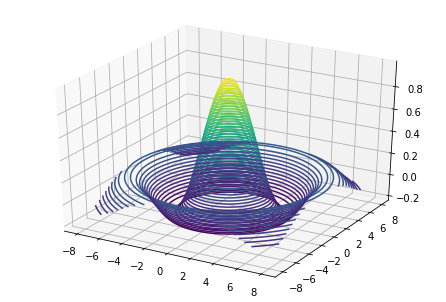

In [173]:
fig=plt.figure()
ax=mplot3d.Axes3D(fig)
ax.contour3D(x.numpy(),y.numpy(),z.numpy(),50)
plt.show()

## 5.7 经典数据集加载

In [174]:
import tensorflow as t
from tensorflow import keras
from tensorflow.keras import datasets

In [175]:
(x,y),(x_test,y_test)=datasets.mnist.load_data()

In [177]:
print('x:',x.shape,' y:',y.shape,' x_test:',x_test.shape,' y_test:',y_test.shape)

x: (60000, 28, 28)  y: (60000,)  x_test: (10000, 28, 28)  y_test: (10000,)


In [178]:
train_db=tf.data.Dataset.from_tensor_slices((x,y))

#### 5.7.1 随机打散

In [179]:
train_db=train_db.shuffle(10000)
for x,y in train_db:
    break
print(x.shape,y.shape)

(28, 28) ()


#### 5.7.2 随机打散

In [181]:
train_db=train_db.batch(128)
for x,y in train_db:
    break
print(x.shape,y.shape)

(128, 28, 28) (128,)


#### 5.7.3 预处理

In [182]:
def preprocess(x,y):
    x=tf.cast(x,dtype=tf.float32)
    x=tf.reshape(x,[-1,28*28])
    y=tf.cast(y,dtype=tf.int32)
    y=tf.one_hot(y,depth=10)
    return x,y

In [183]:
train_db=train_db.map(preprocess)

In [184]:
for x,y in train_db:
    break
print(x.shape,y.shape)

(128, 784) (128, 10)


#### 5.7.4 循环训练

## 5.8 MNIST测试代码

In [185]:
#%%
import  matplotlib
from    matplotlib import pyplot as plt
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers
import  os

In [186]:
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

2.0.0


In [187]:
def preprocess(x, y): 
    # [b, 28, 28], [b]
    print(x.shape,y.shape)
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)

    return x,y

In [188]:
#%%
(x, y), (x_test, y_test) = datasets.mnist.load_data()
print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:', y_test)
#%%
batchsz = 512
train_db = tf.data.Dataset.from_tensor_slices((x, y))
train_db = train_db.shuffle(1000).batch(batchsz).map(preprocess).repeat(20)

x: (60000, 28, 28) y: (60000,) x test: (10000, 28, 28) y test: [7 2 1 ... 4 5 6]
(None, 28, 28) (None,)


In [189]:
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = test_db.shuffle(1000).batch(batchsz).map(preprocess)
x,y = next(iter(train_db))
print('train sample:', x.shape, y.shape)
# print(x[0], y[0])

(None, 28, 28) (None,)
train sample: (512, 784) (512, 10)


0 loss: 0.7965435981750488
0 Evaluate Acc: 0.0703
80 loss: 0.18517686426639557
80 Evaluate Acc: 0.1872
160 loss: 0.14986884593963623
160 Evaluate Acc: 0.2935
240 loss: 0.12157630920410156
240 Evaluate Acc: 0.3715
320 loss: 0.11143557727336884
320 Evaluate Acc: 0.4305
400 loss: 0.10438452661037445
400 Evaluate Acc: 0.4746
480 loss: 0.09356989711523056
480 Evaluate Acc: 0.5107
560 loss: 0.09415390342473984
560 Evaluate Acc: 0.5418
640 loss: 0.08668200671672821
640 Evaluate Acc: 0.5676
720 loss: 0.07993973791599274
720 Evaluate Acc: 0.5898
800 loss: 0.0802367553114891
800 Evaluate Acc: 0.6078
880 loss: 0.07628235965967178
880 Evaluate Acc: 0.6222
960 loss: 0.0710088387131691
960 Evaluate Acc: 0.6373
1040 loss: 0.07385615259408951
1040 Evaluate Acc: 0.6509
1120 loss: 0.07061231136322021
1120 Evaluate Acc: 0.6653
1200 loss: 0.06600978225469589
1200 Evaluate Acc: 0.6764
1280 loss: 0.06670383363962173
1280 Evaluate Acc: 0.6878
1360 loss: 0.06818591058254242
1360 Evaluate Acc: 0.6969
1440 loss

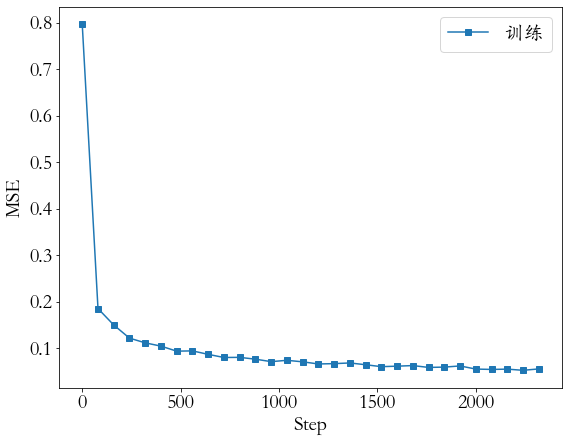

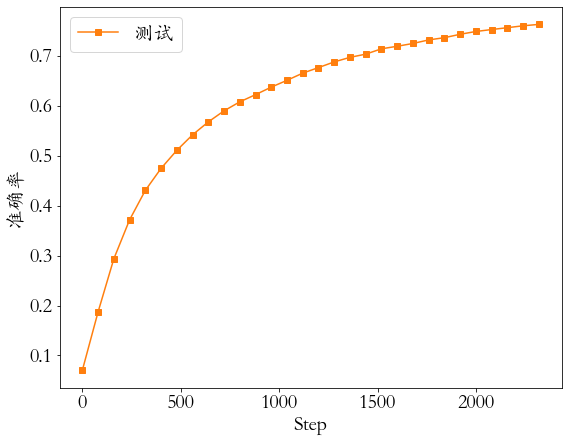

In [190]:
#%%
def main():

    # learning rate
    lr = 1e-2
    accs,losses = [], []

    # 784 => 512
    w1, b1 = tf.Variable(tf.random.normal([784, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
    # 512 => 256
    w2, b2 = tf.Variable(tf.random.normal([256, 128], stddev=0.1)), tf.Variable(tf.zeros([128]))
    # 256 => 10
    w3, b3 = tf.Variable(tf.random.normal([128, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))

    for step, (x,y) in enumerate(train_db):
 
        # [b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 784))

        with tf.GradientTape() as tape:

            # layer1.
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # layer2
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # output
            out = h2 @ w3 + b3
            # out = tf.nn.relu(out)

            # compute loss
            # [b, 10] - [b, 10]
            loss = tf.square(y-out)
            # [b, 10] => scalar
            loss = tf.reduce_mean(loss)

 
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3]) 
        for p, g in zip([w1, b1, w2, b2, w3, b3], grads):
            p.assign_sub(lr * g)


        # print
        if step % 80 == 0:
            print(step, 'loss:', float(loss))
            losses.append(float(loss))
 
        if step %80 == 0:
            # evaluate/test
            total, total_correct = 0., 0

            for x, y in test_db:
                # layer1.
                h1 = x @ w1 + b1
                h1 = tf.nn.relu(h1)
                # layer2
                h2 = h1 @ w2 + b2
                h2 = tf.nn.relu(h2)
                # output
                out = h2 @ w3 + b3
                # [b, 10] => [b]
                pred = tf.argmax(out, axis=1)
                # convert one_hot y to number y
                y = tf.argmax(y, axis=1)
                # bool type
                correct = tf.equal(pred, y)
                # bool tensor => int tensor => numpy
                total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
                total += x.shape[0]

            print(step, 'Evaluate Acc:', total_correct/total)

            accs.append(total_correct/total)


    plt.figure()
    x = [i*80 for i in range(len(losses))]
    plt.plot(x, losses, color='C0', marker='s', label='训练')
    plt.ylabel('MSE')
    plt.xlabel('Step')
    plt.legend()
    plt.savefig('train.svg')

    plt.figure()
    plt.plot(x, accs, color='C1', marker='s', label='测试')
    plt.ylabel('准确率')
    plt.xlabel('Step')
    plt.legend()
    plt.savefig('test.svg')

main()